# Анализ продаж компьютерных игр до 2016 года

**Заказчик**: владелец магазина компьютерных игр «Стримчик».

**Цель проекта**: выявить определяющие успешность игры закономерности, для того, чтобы владелец магазина компьютерных игр «Стримчик» смог сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год.

**Входные данные**: исторические данные о продаже игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).


**План проекта:**

 1. Загрузка и обзор данных;
 2. Предобработка данных;
 3. Исследовательский анализ данных;
 4. Определение портрета пользователя каждого региона;
 5. Проверка статистических гипотиз;
 6. Вывод по проекту.

## Изучение данных

### Обзор данных из файла

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st

df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Описание данных:**

- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Вывод общей информации о файле

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из данных видим пропуски в нескольких колонках, а также неверные типы данных, которые мы подробнее рассмотрим в следующей главе.

### Вывод по первой главе

Первым шагом мы открыли файл с предоставленными данными, вывели первые 10 строк и визуально с ними ознакомились. Данных много, расшифровка каждой колонки у нас есть, в глаза бросается наличие пропусков в данных, которые мы изучим на этапе предобработки данных, а также нарушение регистра при именовании колонок. Это мы также исправим на этапе предобработки данных.

## Подготовка данных к анализу

### Иправление регистра и смена типов данных

Первым шагом исправим регистр в названиях столбцов:

In [3]:
df.columns = df.columns.str.lower()

Следующим шагом исправим колонку "year_of_release", так как она сразу бросается в глаза. Сейчас там тип данных - float, с плавающей запятой, а нам нужно целое число - int:

In [4]:
df['year_of_release'] = np.int64(df['year_of_release']) 
#проверим:
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


Также нам нужно изменить тип данных столбца 'user_score' с object на int.

При помощи df['user_score'] = df['user_score'].astype('float') изменить не удается, выдает ошибку из которой ясно, что есть не только числовые значения в столбце, поэтому выведем список уникальных значений столбца

In [5]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В данных есть какое-то непонятное значение "TBD".

In [6]:
#подсчитаем количество строк с TBD:
df[df['user_score'] == 'tbd']['user_score'].count()

2424

In [7]:
#процентное соотношение:
2424/16715*100

14.501944361352079

Исходя из поиска информации в интернете, есть два варианта этой абревиатуры "To Be Determined" или "To be announced". Видимо, это означает, что оценка не еще не посчитана, либо это вообще техническая ошибка при выгрузке. 
В любом случае, данных по оценке нет и мы можем заменить "tbd" просто на "nan".

In [8]:
#меняем на NAN:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan
#проверяем:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

Замена прошла успешно, переходим к смене типов данных:

In [9]:
#меняем тип на float:
df['user_score'] = df['user_score'].astype('float')
#проверяем все, что меняли:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


И 'user_score', и 'year_of_release' перевелись в нужные типы. 

### Проверка на дубликаты

Проверим данные на явные дубликаты.

In [10]:
# подсчёт явных дубликатов
df.duplicated().sum()

0

Явных дубликатов нет, проверим на неявные дубликаты и аномальные значения:

In [11]:
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Тут все в порядке. Смотрим следующий столбец:

In [12]:
df['year_of_release'].sort_values().unique()

array([-9223372036854775808,                 1980,                 1981,
                       1982,                 1983,                 1984,
                       1985,                 1986,                 1987,
                       1988,                 1989,                 1990,
                       1991,                 1992,                 1993,
                       1994,                 1995,                 1996,
                       1997,                 1998,                 1999,
                       2000,                 2001,                 2002,
                       2003,                 2004,                 2005,
                       2006,                 2007,                 2008,
                       2009,                 2010,                 2011,
                       2012,                 2013,                 2014,
                       2015,                 2016], dtype=int64)

Дубликатов нет, но тут есть аномалия, значение - 9223372036854775808. Посмотрим сколько таких строк:

In [13]:
len(df[df['year_of_release'] == -9223372036854775808])

269

Аномальное значение -9223372036854775808, таких строк - 269.

In [14]:
#в процентах:
round(269/16714*100, 2)

1.61

От общего количества это всего 1,6 %. Мы удалим эти строки, так как у нас дальше анализ будет проводиться в разрезе по годам, а эти данные мы ни как использовать не сможем, они только помешают нам.

In [15]:
#удаляем, проверяем:
df.drop(df[df.year_of_release == -9223372036854775808].index, inplace=True)  
df['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016], dtype=int64)

Все удалилось корректно. Смотрим следующий столбец:

In [16]:
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

Тут все хорошо. Смотрим следующий столбец:

In [17]:
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Тут также нет каких-то явных дублей и аномалий.

### Работа с пропусками

Выведем общую информацию о пропусках в столбцах датасета:

In [18]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

В процентах:

In [19]:
df.isna().mean().sort_values(ascending = False)*100

user_score         54.621184
critic_score       51.459321
rating             40.605618
name                0.012161
genre               0.012161
platform            0.000000
year_of_release     0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

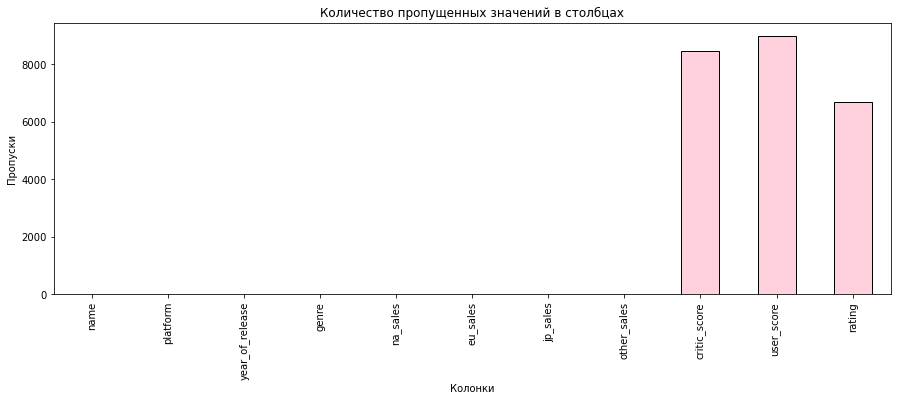

In [20]:
# график для наглядности:
df.isna().sum().plot(kind='bar', title='Количество пропущенных значений в столбцах',
                     figsize=(15, 5), color='#ffd1dc',  ec='black')
plt.xlabel('Колонки')
plt.ylabel('Пропуски')
plt.show()

Значительное количество пропусков мы видим только в столбцах 'critic_score', 'user_score' и 'rating'. Есть еще по 2 пропуска в столбцах 'name', 'genre', их мы просто удалим, так как 2 пропука из 16 тысяч строк - это очень мало, чтобы повлиять на анализ.

In [21]:
df[df['name'].isna()].head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Тем более, что это одни и теже две строки.

In [22]:
#Удаляем, проверяем:
df.dropna(subset=["name"],inplace = True,axis = 0 )
df=df.reset_index(drop=True)
df['name'].isna().sum()
df['genre'].isna().sum()

0

Поставим заглушку вместо NAN в столбце с рейтингом, чтобы потом это нам не помешало в исследовательском анализе:

In [23]:
df['rating'] = df['rating'].fillna("AAA")
#проверяем:
df['rating'].sort_values().unique()

array(['AAA', 'AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'],
      dtype=object)

У нас остается большое количество пропусков в графах с оценками критиков и пользователей. Их заполнять не будем, так как оценки - это важные показатели, причин отсутствия оценок мы не знаем, у нас далее будет анализ по этим показателям и две гипотезы, которые нужно будет проверить. Размывать и искажать данные, заполняя их каким-либо способом не кажется правильным решением.

### Добавление данных о суммарных продажах по регионам

Добавим дополнительный столбец, в него внесем сумму продаж по всем регионам.

In [24]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,AAA,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


Готово.

### Вывод по второй главе

**При подготовке данных к анализу были проделаны следующие шаги:**

- Приведение названий столбцов к нижнему регистру;
- Смена типов данных в трех столбцах (year_of_release, user_score) на нужные (int и float). Также мы заменили значение "tbd" на "nan" в столбце "user_score", что мешало нам изменить данные на нужный тип;
- Проверили данные на дубликаты (их не обнаружено) и аномалии (одну нашли удалили в столбце "year_of_release";
- Рассмотрели пропуски в данных, удалили их там, где значение было минимальным (name, genre);
- Добавили данные о суммарных продажах по региону в датасет.

Теперь данные готовы к дальнейшему анализу.

## Исследовательский анализ данных

### Изучение выпуска игр по годам

Рассмотрим выпуск игр по годам, определим, какую выборку по годам мы можем сформировать для анализа:

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


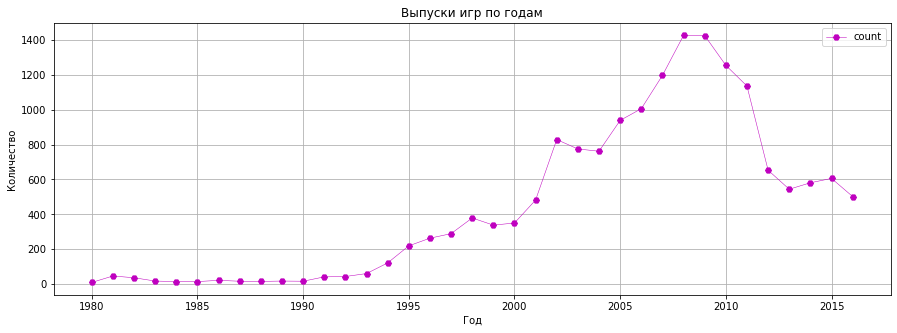

In [25]:
# Cгруппируем данные в отдельную таблицу для наглядности:
game_releases_by_year = df.pivot_table(
    index='year_of_release', values='name', aggfunc='count')
game_releases_by_year.columns = ['count']

# Построим график:
display(game_releases_by_year)
game_releases_by_year.plot(style='H', linestyle="-", linewidth=0.5,
                           title='Выпуски игр по годам', color='m', figsize=(15, 5), grid=True)
plt.xlabel('Год')
plt.ylabel('Количество');

По графику видно, что большая доля выпусков приходится на период с примерно с 2002 года по 2015 годы.
Самые высокие значения - 2006 - 2011 годы.
В период же с 1980 по 1994 годы выпусков крайне мало и этот период можно будет в дальнейшем не использовать при анализе.

Выберем для дальнейшего анализа промежуток с 2000 по 2015 год. Далее посмотрим нужно ли этот промежуток еще сузить.

### Изучение продаж по платформам

Посчитаем общие продажи по платформам и выведем их в виде отдельной таблицы, отсортируем и построим график для наглядности.

In [26]:
platform_sales_total = df.pivot_table(index='platform', values = 'all_sales', aggfunc = 'sum')
platform_sales_total.sort_values('all_sales', ascending = False)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


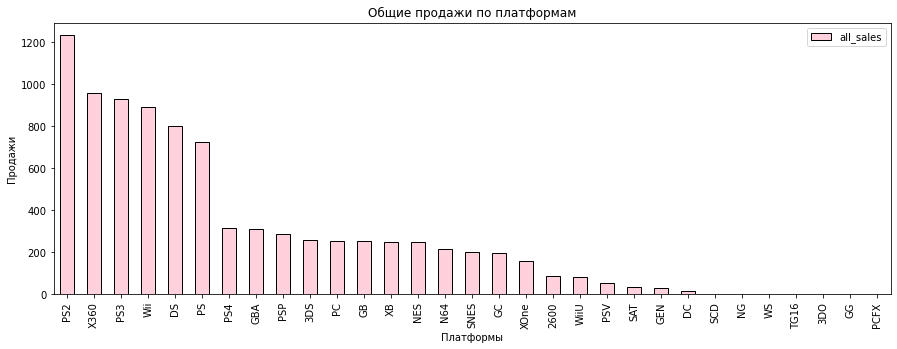

In [27]:
# Сортируем, строим график:
platform_sales_total.sort_values('all_sales', ascending=False).plot(
    kind='bar', title='Общие продажи по платформам', ec='black', color='#ffd1dc', figsize=(15, 5))
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

По графику мы видим топ-6 лидеров продаж со сзначениями на порядок выше, чем у остальных. Но это данные по продажам за все годы, информация по которым есть в датасете. В предыдущем шаге мы посмотрели продажи по годам и выявили, что пик приходится с 2000 года, до этого времени продаж было не так много. Поэтому рассмотрим продажи по платформам за срез с 2000 по 2015, это поможет нам корректнее выбрать лидирующие платформы.

In [28]:
#выведем в таблицу общие продажи по платформам с 2000 по 2016 годы:
al_sales_filtered_year = df.query('year_of_release >= 2000').pivot_table(index='platform', values = 'all_sales', aggfunc = 'sum')
al_sales_filtered_year.sort_values('all_sales', ascending = False)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.88
PSP,289.53
3DS,257.81


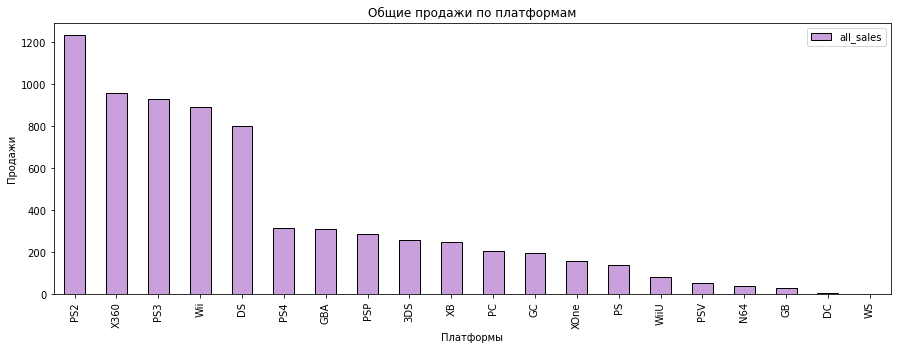

In [29]:
# Сортируем, строим график:
al_sales_filtered_year.sort_values('all_sales', ascending=False).plot(
    kind='bar', title='Общие продажи по платформам', ec='black', color='#c9a0dc', figsize=(15, 5))
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

Абсолютные лицеры практически те же, первые пять совпадают с данными по всему датасету, только PS уступил свои лидерские позиции. Платформы справа на графике, начиная с WIU, можно будет отбросить, на них продаж меньше всего, как на срезе, так и за все годы. Выделим топ-10 платформ для дальнейшего анализа, и топ-5:

In [30]:
#топ-5 платформ за 2000-2015:
top_five_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

#топ-10 платформ за 2000-2015:
top_ten_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'GBA', 'PSP', '3DS', 'XB']

Далее нам нужно рассмтотреть, как менялись продажи игр по годам по платформам на срезе с 2000 по 2015. Брать данные за ранний период смысла нет, там продаж мало. 

In [31]:
#выведем в отдельную таблицу продажи по платформам актуальный период:
actual_years = df[df['year_of_release'] >= 2000]
platform_statistics = actual_years.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum', fill_value='-')
platform_statistics

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
3DS,-,-,-,-,-,-,-,-,-,-,-,63.2,51.36,56.57,43.76,27.78,15.14
DC,5.99,1.07,0.29,-,-,-,-,0.02,0.04,-,-,-,-,-,-,-,-
DS,-,-,-,-,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,-,-,-
GB,19.76,9.24,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
GBA,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.4,-,-,-,-,-,-,-,-,-
GC,-,26.34,51.81,50.61,28.82,27.62,11.26,0.27,-,-,-,-,-,-,-,-,-
N64,33.97,3.25,0.08,-,-,-,-,-,-,-,-,-,-,-,-,-,-
PC,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS,96.37,35.59,6.67,2.07,-,-,-,-,-,-,-,-,-,-,-,-,-


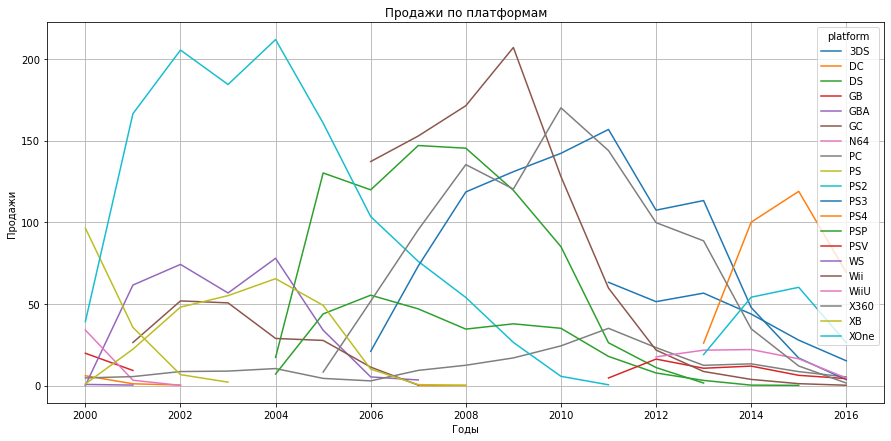

In [32]:
#выведем в график для наглядности:
sales_actual_year = pd.pivot_table(actual_years , index='year_of_release', columns='platform', values='all_sales', aggfunc='sum').plot(figsize=(15,7))
plt.grid(True)
plt.title('Продажи по платформам')
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.show()

Если рассматривать все платформы, то график получается не очень наглядным, много линий, анализировать трудно, но одну тенденцию видно - данные по каждой платформе имеют нормальное распределение (старт продаж, взлет, пик, спад).
Посмотрим те же данные но только по топу продаж.

Сначала посмотрим на топ-10 платформ:

In [33]:
#выберем строки датасета, в которых содержатся данные по топ-10 платформ:
top_ten_platform = df.query('platform.isin(["PS2", "X360", "PS3", "Wii", "DS", "PS4", "GBA", "PSP", "3DS", "XB"]).values')

In [34]:
#выведем в отдельную таблицу продажи по платформам актуальный период:
actual_years_and_platform10 = top_ten_platform[top_ten_platform['year_of_release'] >= 2000]
platform_statistics = actual_years_and_platform10.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum', fill_value='-')
platform_statistics

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
3DS,-,-,-,-,-,-,-,-,-,-,-,63.2,51.36,56.57,43.76,27.78,15.14
DS,-,-,-,-,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,-,-,-
GBA,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.4,-,-,-,-,-,-,-,-,-
PS2,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.9,26.4,5.64,0.45,-,-,-,-,-
PS3,-,-,-,-,-,-,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.6
PS4,-,-,-,-,-,-,-,-,-,-,-,-,-,25.99,100.0,118.9,69.25
PSP,-,-,-,-,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,-
Wii,-,-,-,-,-,-,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
X360,-,-,-,-,-,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


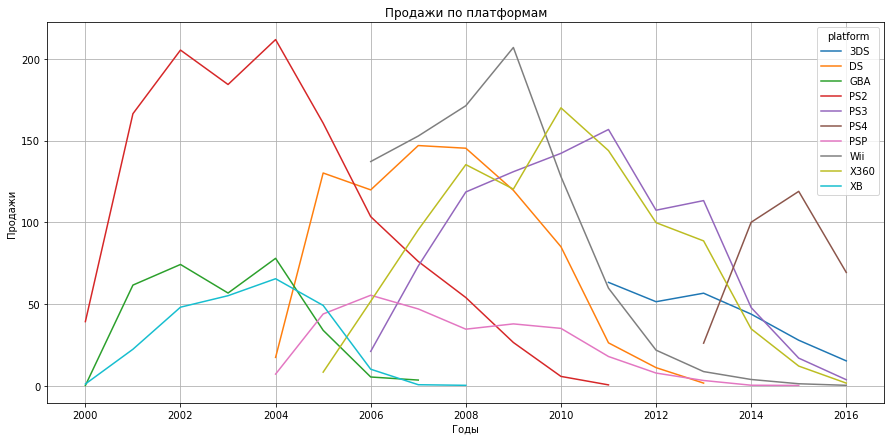

In [35]:
sales_actual_years_and_platform10 = pd.pivot_table(
    actual_years_and_platform10, index='year_of_release', columns='platform', values='all_sales', aggfunc='sum').plot(figsize=(15, 7))
plt.grid(True)
plt.title('Продажи по платформам')
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.show()

Тут уже график читается легче, мы также видим рост, пик, спад по всем платформам. 
Посмотрим средний срок жизни платформ из топ-10:

In [36]:
top_ten_cicle = actual_years_and_platform10.groupby(['platform', 'year_of_release']).agg({'all_sales':'sum'}).reset_index()
top_ten_cicle['platform'].value_counts()

PS2     12
PSP     12
X360    12
PS3     11
Wii     11
DS      10
XB       9
GBA      8
3DS      6
PS4      4
Name: platform, dtype: int64

Средний срок - 9,5 лет.

Теперь посмотрим данные по топ-5 платформ:

In [37]:
#выберем строки датасета, в которых содержатся данные по топ-5 платформ:
top_five_platform = df.query('platform.isin(["PS2", "X360", "PS3", "Wii", "DS"]).values')

In [38]:
#выведем в отдельную таблицу продажи по платформам актуальный период:
actual_years_and_platform = top_five_platform[top_five_platform['year_of_release'] >= 2000]
platform_statistics = actual_years_and_platform.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum', fill_value='-')
platform_statistics

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
DS,-,-,-,-,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,-,-,-
PS2,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,-,-,-,-,-
PS3,-,-,-,-,-,-,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.6
Wii,-,-,-,-,-,-,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
X360,-,-,-,-,-,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


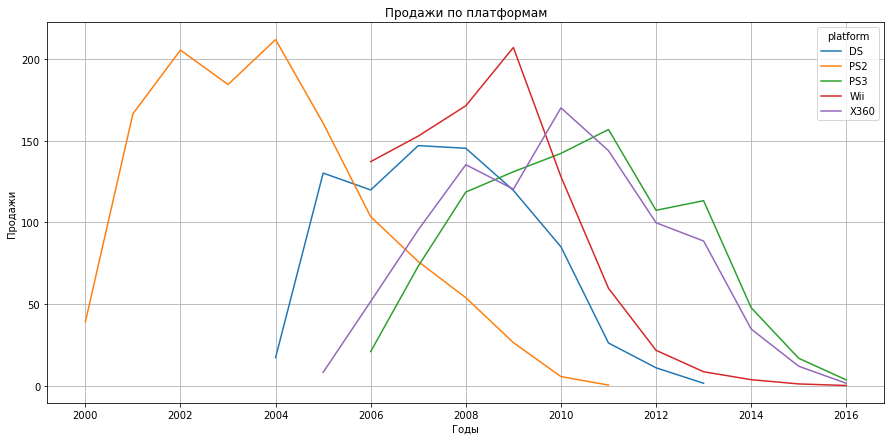

In [39]:
# Построим график по топ-5:
sales_actual_year_and_platform = pd.pivot_table(
    actual_years_and_platform, index='year_of_release', columns='platform', values='all_sales', aggfunc='sum').plot(figsize=(15, 7))
plt.grid(True)
plt.title('Продажи по платформам')
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.show()

Посмотрим средний срок жизни платформ из топ-5:

In [40]:
#Сколько лет "живет" Топ10 платформ
top_five_cicle = actual_years_and_platform.groupby(['platform', 'year_of_release']).agg({'all_sales':'sum'}).reset_index()
top_five_cicle['platform'].value_counts()

PS2     12
X360    12
PS3     11
Wii     11
DS      10
Name: platform, dtype: int64

Тут цикл жизни чуть больше - 11,2 года. Так как топ-5 значительно опережает по уровню продаж остальные платформы, лучше ориентироваться на цикл топ-10 в 9 лет. Примерно столько и живут платформы.

Для дальнейшего анализа нам необходимо определиться с размером актуально периода. Рассматриваемая выборка с 2000 по 2015 года слишком велика, учитывая, что цикл жизни платформы - примерно 9 лет. Можно выбрать срок в 5 лет, он меньше, чем срок жизни средней платформы, но достаточно большой, чтобы получить относительно актуальные данные.

**И так, выбираем период для дальнейшего анализа с 2011 по 2016 год.**

Посмотрим, как обстоят дела с продажами по платформам в этот период:

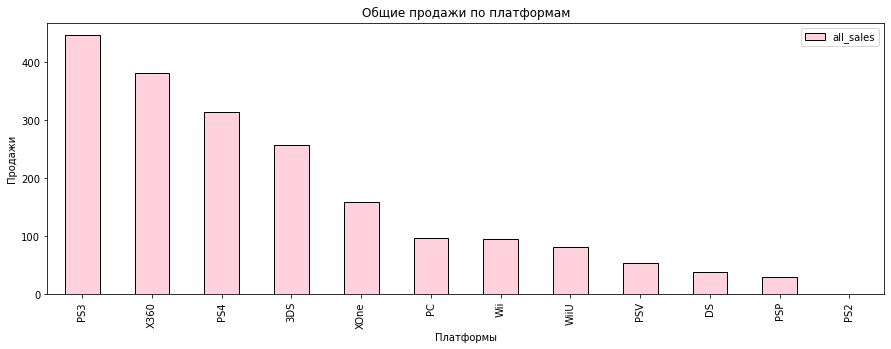

In [41]:
# Сортируем, строим график:
al_sales_filtered_year_actual = df.query('year_of_release >= 2011').pivot_table(
    index='platform', values='all_sales', aggfunc='sum')

al_sales_filtered_year_actual.sort_values('all_sales', ascending=False).plot(
    kind='bar', title='Общие продажи по платформам', ec='black', color='#ffd1dc', figsize=(15, 5))
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

В лидерах: PS3, X360, PS4, 3DS, Xone.

In [42]:
# выведем статистику по продажам с 2011 по 2016 годы:
last_five_year = df[df['year_of_release'] >= 2011]
last_five_year_stat = last_five_year.pivot_table(
    index='platform', columns='year_of_release', values='all_sales', aggfunc='sum', fill_value='-')
last_five_year_stat

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,63.2,51.36,56.57,43.76,27.78,15.14
DS,26.18,11.01,1.54,-,-,-
PC,35.03,23.22,12.38,13.28,8.52,5.25
PS2,0.45,-,-,-,-,-
PS3,156.78,107.36,113.25,47.76,16.82,3.6
PS4,-,-,25.99,100.0,118.9,69.25
PSP,17.82,7.69,3.14,0.24,0.12,-
PSV,4.63,16.19,10.59,11.9,6.25,4.25
Wii,59.65,21.71,8.59,3.75,1.14,0.18


Мы видим, что в 2016 году ни одна платформа не нахoдится на пике, все платформы показывают спады продаж.
Какие-то платформы уже не существуют.

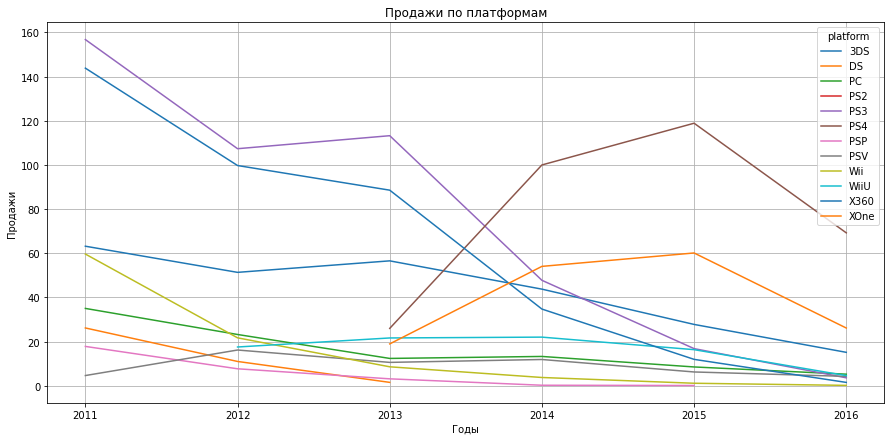

In [43]:
# выведем информацию в виде графика:
sales_last_five_year = pd.pivot_table(last_five_year, index='year_of_release',
                                      columns='platform', values='all_sales', aggfunc='sum').plot(figsize=(15, 7))
plt.grid(True)
plt.title('Продажи по платформам')
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.show()

По графику видно, что до 2016 дожили не все платформы. 
Выведем данные по 2016 отдельно, чтобы узнать, какие платформы откинуть:

In [44]:
last_five_year = df[df['year_of_release'] >= 2016]
last_five_year_stat = last_five_year.pivot_table(
    index='platform', columns='year_of_release', values='all_sales', aggfunc='sum', fill_value='-')
last_five_year_stat

year_of_release,2016
platform,
3DS,15.14
PC,5.25
PS3,3.60
PS4,69.25
PSV,4.25
Wii,0.18
WiiU,4.60
X360,1.52
XOne,26.15


9 штук, при этом сразу можно откинуть еще и платформу "Wii", продаж крайне мало, за последние три года спад. При ее динамике продаж, в 2017 году она уже не будет существовать. Отфильтруем данные за 5 лет по данным платформам:

In [45]:
# выведем в отдельную таблицу продажи по платформам актуальный период:
last_five_year_platform = df.query(
    'platform.isin(["3DS", "PC", "PS3", "PS4", "PSV", "WiiU", "X360", "XOne"]).values')
last_five_year_platform_table = last_five_year_platform[
    last_five_year_platform['year_of_release'] >= 2011]
platform_statistics_last_five_year_platform_table = last_five_year_platform_table.pivot_table(
    index='platform', columns='year_of_release', values='all_sales', aggfunc='sum', fill_value='-')
platform_statistics_last_five_year_platform_table

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,63.2,51.36,56.57,43.76,27.78,15.14
PC,35.03,23.22,12.38,13.28,8.52,5.25
PS3,156.78,107.36,113.25,47.76,16.82,3.60
PS4,-,-,25.99,100.00,118.90,69.25
PSV,4.63,16.19,10.59,11.90,6.25,4.25
WiiU,-,17.56,21.65,22.03,16.35,4.60
X360,143.84,99.74,88.58,34.74,11.96,1.52
XOne,-,-,18.96,54.07,60.14,26.15


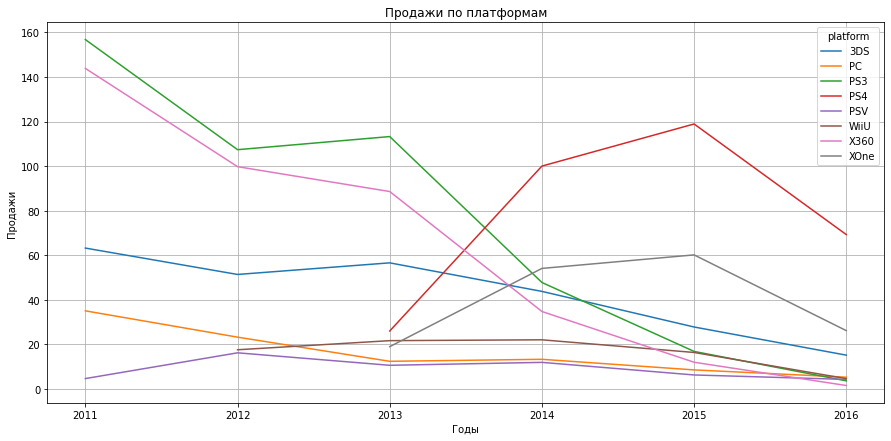

In [46]:
# построим график:
sales_last_five_year_platform_table = pd.pivot_table(
    last_five_year_platform_table, index='year_of_release', columns='platform', values='all_sales', aggfunc='sum').plot(figsize=(15, 7))
plt.grid(True)
plt.title('Продажи по платформам')
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.show()

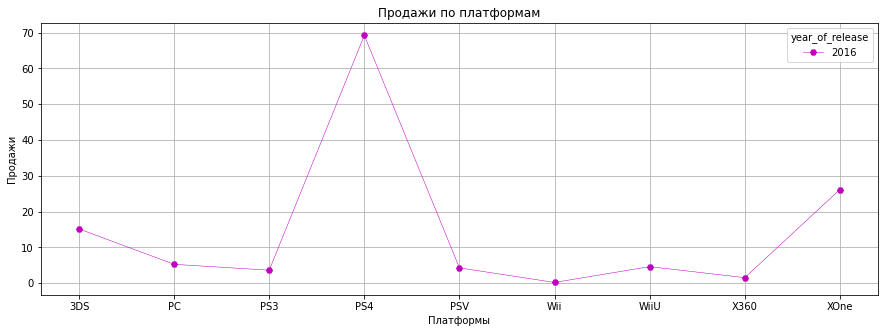

In [47]:
# посмотрим отдельно 2016 год:
last_five_year = df[df['year_of_release'] >= 2016]
last_five_year_stat = last_five_year.pivot_table(
    index='platform', columns='year_of_release', values='all_sales', aggfunc='sum', fill_value='-')
last_five_year_stat.plot(style='H', linestyle="-", linewidth=0.5,
                         title='Продажи по платформам', color='m', figsize=(15, 5), grid=True)
plt.xlabel('Платформы')
plt.ylabel('Продажи');

Если расмотреть гарфики и таблицу выше, выбрать те платформы, которые вероятно продолжат существовавние в 2017 году, то это будут (в порядке убывания):

1. ps4
2. xone
3. 3ds
4. pc
5. wiiu
6. psv

Лидерами по продажам из них являются ps4, xone, 3ds. 
Ставку на продажи для магазина стоит сделать именно на них.

### Изучение глобальных продаж игр в разбивке по платформам

Построим ящики с усами (boxplot) для каждой платформы по показателю глобальных продаж (all_sails) и сравним их между собой:

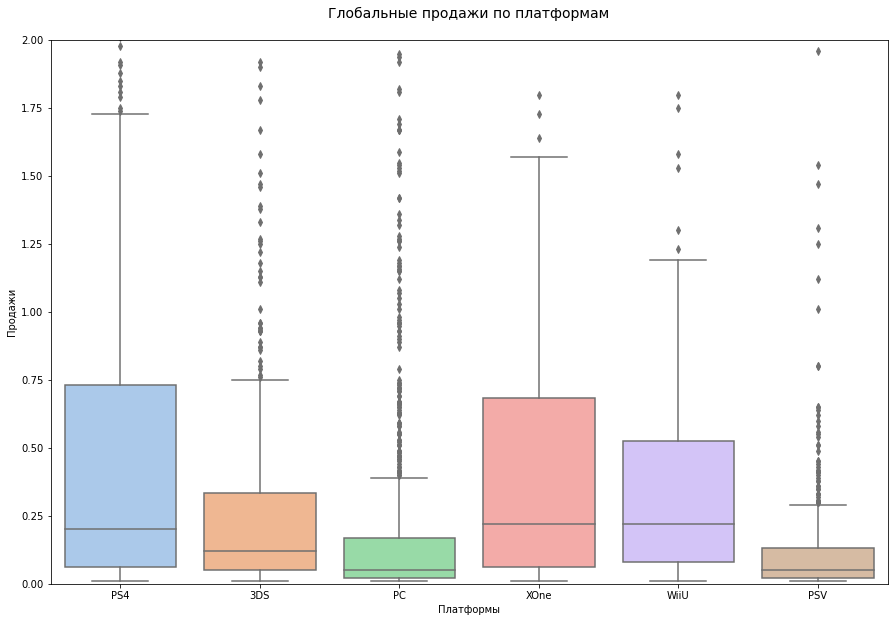

In [48]:
top_actuals_platform = df.query('platform.isin(["PS4", "XOne", "3DS", "PC", "WiiU", "PSV"]).values')
plt.figure(figsize=(15, 10))
plt.ylim(0, 2)
sns.boxplot(x="platform", y="all_sales", data = top_actuals_platform , palette='pastel')
plt.title('Глобальные продажи по платформам\n  ', fontsize=14)
plt.ylabel('Продажи')
plt.xlabel('Платформы');

Лидеры по продажам за последние 5 лет - PS4, Xone, WiiU. 

### Изучение влияния отзывов на продажи игр

Рассмотрим влияние отзывов покупателей и критиков на продажи игр на примере PS4, так как она лидер по продажам. 

In [49]:
#Отфильтруем данные по платформе PS4:
ps4 = actual_years.query('platform == "PS4"')
ps4_filter = ps4[['critic_score', 'user_score', 'all_sales']]

Построим диаграммы рассеяния:

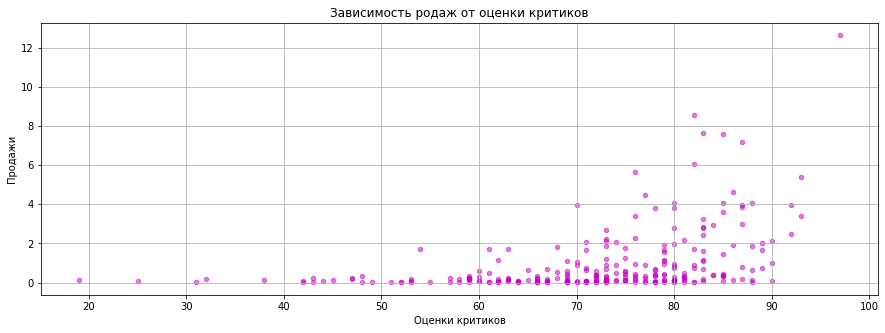

In [50]:
#зависисмость от оценки критиков:
ps4_filter.plot(kind='scatter', x='critic_score', y='all_sales', figsize=(15,5), color='m', alpha=0.5, grid=True)
plt.ylabel('Продажи')
plt.xlabel('Оценки критиков')
plt.title('Зависимость родаж от оценки критиков');

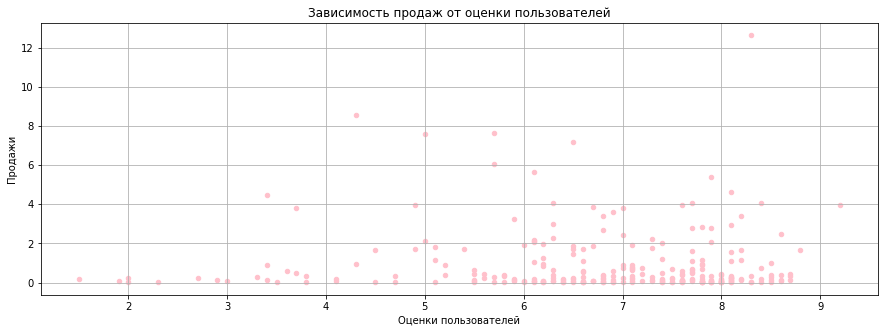

In [51]:
#зависимость от оценки пользователей:
ps4_filter.plot(kind='scatter', x='user_score', y='all_sales', figsize=(15,5), color='pink', grid=True)
plt.ylabel('Продажи')
plt.xlabel('Оценки пользователей')
plt.title('Зависимость продаж от оценки пользователей');

По графикам не заметно какой-то сильно корреляции между оценками пользователей, критиков и продажами.


In [52]:
ps4_filter.corr().round(2)

,critic_score,user_score,all_sales
critic_score,1.00,0.56,0.41
user_score,0.56,1.00,-0.03
all_sales,0.41,-0.03,1.00


По оценке пользователей корреляция нулевая. 
По оценке критиков - есть, но довольно слабая. 

Посмотрим, есть ли корреляция, если смотреть не в разрезе одной платформы:

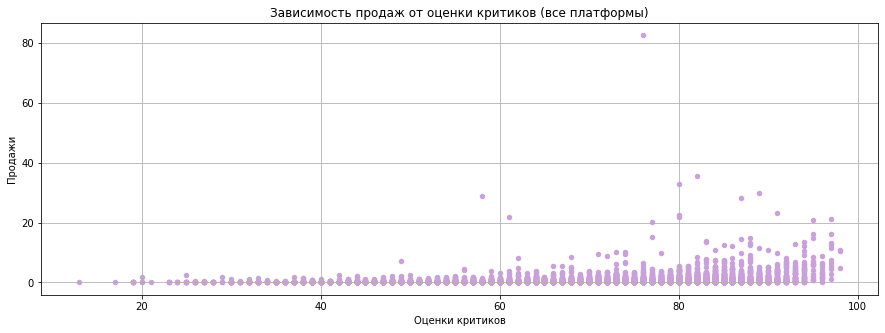

In [53]:
actual_years.plot(kind='scatter', x='critic_score', y='all_sales', figsize=(15,5), color='#c9a0dc', grid=True)
plt.ylabel('Продажи')
plt.xlabel('Оценки критиков')
plt.title('Зависимость продаж от оценки критиков (все платформы)');

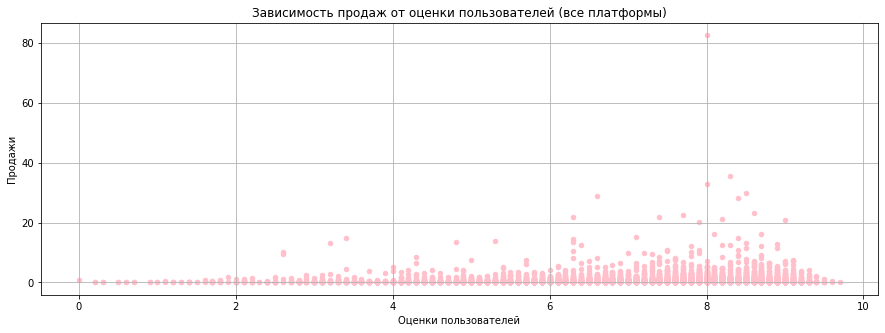

In [54]:
actual_years.plot(kind='scatter', x='user_score', y='all_sales', figsize=(15,5), color='pink', grid=True)
plt.ylabel('Продажи')
plt.xlabel('Оценки пользователей')
plt.title('Зависимость продаж от оценки пользователей (все платформы)');

In [55]:
actual_years_cor = actual_years[['critic_score', 'user_score', 'all_sales']]
actual_years_cor.corr().round(2)

,critic_score,user_score,all_sales
critic_score,1.00,0.58,0.24
user_score,0.58,1.00,0.08
all_sales,0.24,0.08,1.00


По всем платформам мы видим почти такую же картину. 
У продаж с оценками пользователей корреляция почти нулевая.
У продаж с оценками критиков - есть, но слабая.

### Изучение влияния жанров на продажи

Посчитаем продажи по жанрам:

In [56]:
genre_sales = actual_years.groupby(['genre'])\
                        .agg({'all_sales':'sum', 'name':'count'})\

genre_sales.sort_values(by = 'all_sales', ascending=False)

,all_sales,name
genre,,
Action,1526.16,3079
Sports,1130.92,1979
Shooter,912.70,1129
Role-Playing,731.22,1300
Misc,718.35,1597
Racing,561.06,1035
Platform,494.42,720
Simulation,335.41,768
Fighting,311.90,640


В тройке лидеров: экшн, спортивные игры и стрелялки. Построим график для наглядности:

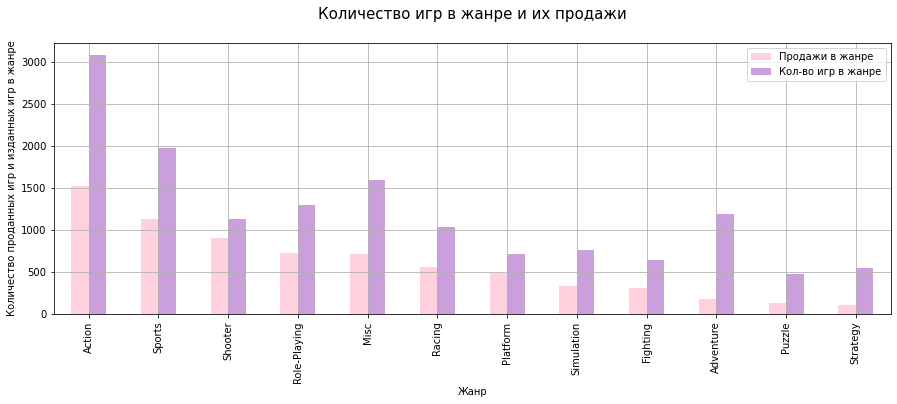

In [57]:
ax = genre_sales[['all_sales', 'name']].sort_values(by='all_sales', ascending=False).plot(
    kind='bar', figsize=(15, 5), color=['#ffd1dc', '#c9a0dc'])

plt.title('Количество игр в жанре и их продажи\n  ', fontsize=15)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр и изданных игр в жанре')
plt.legend(['Продажи в жанре', 'Кол-во игр в жанре'])
plt.grid(True)
plt.show()

По графику мы также видим, что лидер по общему количеству продаж и выпусков - жанр экшн, на втором месте - спортивные игры, на третьем - стрелялки. Но при этом мы видим, что соотношение выпуска к продажам по жанрам разное. 

Аутсайдеры - головоломки и стратегии.

Посмотрим среднее и медину:

In [58]:
# среднее:
genre_sales_mean = actual_years.pivot_table(index='genre', values=['name', 'all_sales'],
                                            aggfunc={'name': 'count', 'all_sales': 'mean'}).sort_values('all_sales', ascending=False).reset_index()
genre_sales_mean

,genre,all_sales,name
0,Shooter,0.808415,1129
1,Platform,0.686694,720
2,Sports,0.571460,1979
3,Role-Playing,0.562477,1300
4,Racing,0.542087,1035
5,Action,0.495667,3079
6,Fighting,0.487344,640
7,Misc,0.449812,1597
8,Simulation,0.436732,768
9,Puzzle,0.288518,479


In [59]:
#медиана:
genre_sales_median = actual_years.pivot_table(index='genre', values=['name','all_sales'],
                           aggfunc={'name':'count','all_sales': 'median'}).sort_values('all_sales',ascending=False).reset_index()
genre_sales_median

,genre,all_sales,name
0,Shooter,0.24,1129
1,Platform,0.21,720
2,Sports,0.21,1979
3,Fighting,0.19,640
4,Action,0.18,3079
5,Racing,0.17,1035
6,Role-Playing,0.16,1300
7,Misc,0.15,1597
8,Simulation,0.14,768
9,Puzzle,0.09,479


Тут распределение немного другое: лидер - стрелялки, платформеры, спортивные игры, симуляторы боев и только потом экшн.


У нас получается, что самые продающиеся по соотношению игр и их продаж, а также общего количества продаж являются: стрелялки, спортивные игры, экшены и ролевые игры.

Аутсайдеры - головоломки и стратегии.


### Вывод по третьей главе

**В ходе исследовательского анализа мы проделали следующие шаги:**
    
- Рассмотрели выпуск игр по годам (большая доля выпуска игр приходится на период 2000-2015 годы, пик периода - 2006-2011. Продажи за предыдущие годы мы отсекси, так как их крайне мало);
- Выделили топ-5 и топ-10 платформ за это время, рассмотрели продажи по этим платформам и приняли решение еще сузить рассматриваемый временной интервал до 2011-2016, так как оказалось, что средний срок жизни платформы меньше этого временного промежутка; 
- Выделили лидеров продаж среди платформ (ps4, xone, 3ds);
- Рассмотрели влияние отзывов покупателей и критиков на продажи игр. Сильного влияния нет;
- Рассмотрели влияние жанров игр на продажи. Лидеры - стрелялки, спортивные игры, экшены и ролевые игры. Аутсайдеры - головоломки и стратегии;    

## Портрет пользователя каждого региона

Нам необходимо выяснить, чем отличаются продажи в разных регионах (у нас их три: Сверная Америка - NA, Европа - EU, Япония - JP).

### Определение топ-5 популярных платформ

Сначала определим топ-5 самых популярных платформ. Период берем с 2015 по 2016 год, чтобы выбрать самый актуальный период, который исключит платформы на сильном спаде и уже умершие платформы:

In [60]:
years_2011_2016 = df[df['year_of_release'] >= 2015]

top_5platform_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_5platform_dict[region] = years_2011_2016.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
top_5platform_dict

{'na_sales': platform
 PS4     63.86
 XOne    50.30
 3DS     10.31
 WiiU     8.86
 X360     8.05
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS4     83.54
 XOne    28.10
 PC       9.10
 3DS      7.39
 PS3      7.30
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 3DS     23.55
 PS4     12.05
 PSV      8.41
 PS3      4.97
 WiiU     4.12
 Name: jp_sales, dtype: float64}

Выведем данные в виде диаграммы-пирога для наглядности:

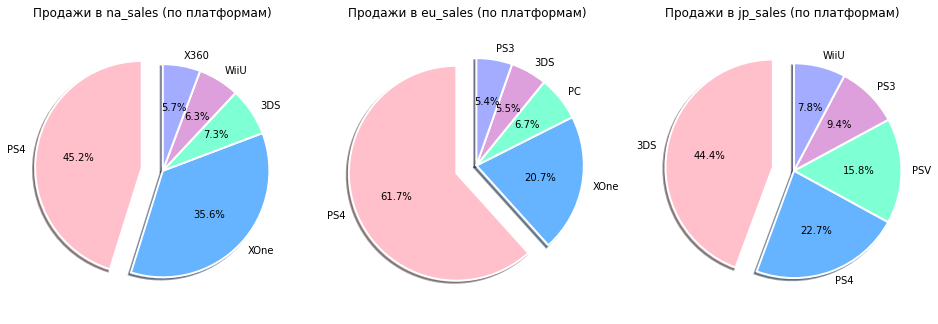

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

#Задаём переменные: 
i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.2, 0, 0, 0, 0)

#Задаём набор цветов:
colors = ['#FFC0CB','#66b3ff','#7FFFD4','#DDA0DD', '#a3acff']

#Цикл для вывода диаграмм распределения платформ: 
for i in [0,1,2]:
    labels = top_5platform_dict[region[i]].index
    sizes = top_5platform_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]} (по платформам)')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors=colors) 
    ax.axis('equal')  
plt.show()

Тут мы видим картину схожую с общим топ-5, который у нас получился в предыдущей главе. Абсолютный лидер - PS4 в Америке и Европе. В Японии - 3DS (это Японская платформа, поэтому региональная популярность обоснована). При этом XOne в Японии вообще нет в 5ке лидеров. Суммарно - абсолютный лидер, как и в общем рейтинге, PS4.

### Определение топ-5 жанров

Выведем данные по продажам в зависимости от жанров:

In [62]:
top_genres_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_genres_dict[region] = years_2011_2016.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
top_genres_dict

{'na_sales': genre
 Shooter         48.18
 Action          33.68
 Sports          26.31
 Role-Playing    19.82
 Misc             5.58
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Shooter         40.28
 Action          34.82
 Sports          27.82
 Role-Playing    17.21
 Racing           6.52
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Action          23.05
 Role-Playing    13.41
 Shooter          3.79
 Misc             3.19
 Adventure        2.22
 Name: jp_sales, dtype: float64}

Построим диаграмму-пирог:

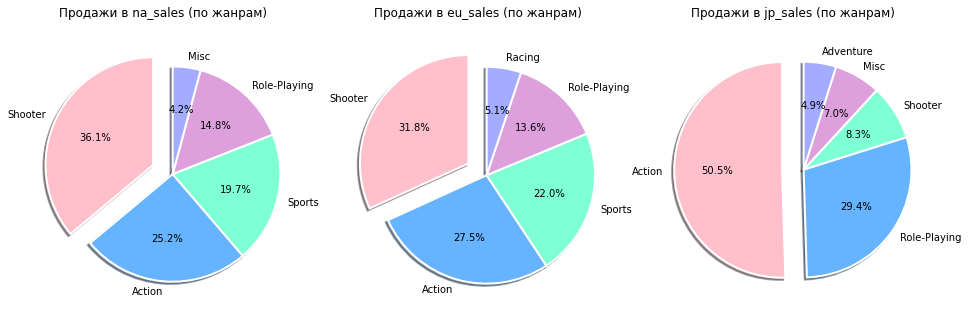

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

#Задаём переменные: 
i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.2, 0, 0, 0, 0)

#Задаём набор цветов:
colors = ['#FFC0CB','#66b3ff','#7FFFD4','#DDA0DD', '#a3acff']

#Цикл для вывода диаграмм распределения жанров: 
for i in [0,1,2]:
    labels = top_genres_dict[region[i]].index
    sizes = top_genres_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]} (по жанрам)')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors=colors) 
    ax.axis('equal')  
plt.show()

Тут также картина схожа между Америкой и Европой, и отличается в Японии. 
В США и Европе стрелялки на первом месте, экшн и спортивные игры на 2м и третьем местах. Отличается только 5 место, в Америке это смешанный жанр, а в Европе - симуляторы поездок.
В Японии во главе рейтинга - жанр экшн, на втором мете ролевые игры и только на третьем стрелялки, причем их доля не велика - 8 процентов. Также, в рейтинге присутствуют приключенческие игры, которых нет в Америке и Европе. 

### Определение влияния рейтинга на продажи

**Значения рейтинга ESRB:**

- **AO (Adults only 18+)** — только для взрослых;
- **E - everyone** - для всех;
- **M (Mature 17+)** — от 17 лет;
- **T (Teen)** — для подростков 13-19 лет;
- **K-A (Kids to Adults)** — для детей и взрослых;
- **E10+ (Everyone 10+)** — для всех старше 10 лет;
- **EC (Early Childhood)** — для детей младшего возраста;
- **RP (Rating pending)** — рейтинг ожидается. Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза. 

Выведем данные по продажам исходя из рейтинга (помним, что для игр без определенного рейтинга мы задали категорию "ААА"):

In [64]:
rating_list1 = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    rating_list1[region] =  years_2011_2016.groupby('rating')[region].sum().sort_values(ascending=False).head(5)
rating_list1

{'na_sales': rating
 M       47.03
 AAA     37.44
 E       26.59
 T       22.86
 E10+    17.87
 Name: na_sales, dtype: float64,
 'eu_sales': rating
 M       45.54
 AAA     35.71
 E       34.83
 T       20.32
 E10+    11.54
 Name: eu_sales, dtype: float64,
 'jp_sales': rating
 AAA     32.89
 T        7.70
 E        5.25
 M        4.29
 E10+     3.27
 Name: jp_sales, dtype: float64}

Построим диаграмму-пирог:

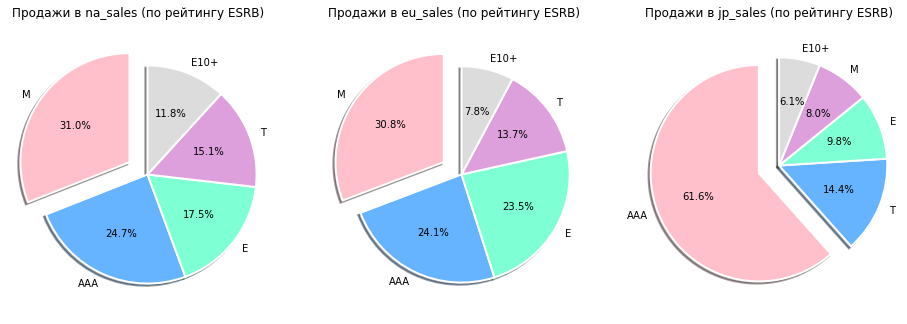

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

#Задаём переменные: 
i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.2, 0, 0, 0, 0)

#Задаём набор цветов:
colors = ['#FFC0CB','#66b3ff','#7FFFD4','#DDA0DD', '#DCDCDC']

#Цикл для вывода диаграмм распределения рейтинга: 
for i in [0,1,2]:
    labels = rating_list1[region[i]].index
    sizes = rating_list1[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]} (по рейтингу ESRB)')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True,startangle=90, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors=colors) 
    ax.axis('equal')  
plt.show()

По графикам мы опять видим схожую картину в Америке и Европе, и отличающуюся в Японии.
В США и Европе самые популярные игры - с широким возрастным рейтингом (для всех возрастов и от 17 лет). В Японии самые популярные игры без возрастного рейтинга, на втором метсе игры для подростков. Можно предположить, что аудитория, покупающая игры в Америке и Европе старше, а в Япониии по большей части подростки.

### Вывод по четвертой главе

Сравнив три региона мы выяснили, что региональные отличия есть и, в основном, в Японии. У Америки и Европы данные, в основном, сходятся. Планировать продажи на Японию нужно отдельно. Картина у нас получилась следующая:

- Лидеры популярных платформ: Америка и Европа - PS4, Япония - 3DS;
- Самые популярные жанры: Америка и Европа - стрелялки, Япония - экшн;
- Самый популярный рейтинг ESRB: Америка и Европа - M (Mature 17+) — от 17 лет, Япония - игры без возрастного рейтинга и T (Teen) — для подростков 13-19 лет.

## Проверка гипотиз

В условии проекта нам поставлено условие проверить следующие гипотизы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Проверка гипотезы о равенстве пользовательского рейтинга Xbox One и PC

У нас есть две платформы, рейтинг которых мы будем сравнивать - Xbox One и PC. Сравнивать будем за промежуток с 2011 по 2016 год (актуальный период). 

**Формируем гипотизы, нулевую и альтернативную:**

- **H0** - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- **H1** - cредние пользовательские рейтинги платформ Xbox One и PC отличаются.

Нам необходимо сравнить среднее двух генеральных совокупностей, среза датасета с оценками Xbox One и среза с оценками PC, поэтому используем метод scipy.stats.ttest_ind (array1, array2, equal_var). При этом, так как это не выборки, а две генеральные совокупности, то мы сможем также просто посчитать средние этих двух совокупностей и сравнить их между собой:

In [66]:
rating_years_2011_2016 = df[df['year_of_release'] >= 2011]

xone = rating_years_2011_2016.query(' platform == "XOne" ')['user_score'].dropna().to_list()
pc = rating_years_2011_2016.query(' platform == "PC" ')['user_score'].dropna().to_list()

#сразу посчитаем средние:
xone_mean = rating_years_2011_2016.query(' platform == "XOne" ')['user_score'].mean()
pc_mean = rating_years_2011_2016.query(' platform == "PC" ')['user_score'].mean()

print('Средний рейтинг ХOne:', xone_mean)
print('Средний рейтинг PC:', pc_mean)
print()

#Рассчитаем дисперсию:
print('Дисперсия XOne =', np.var(xone))    
print('Дисперсия PC =',  np.var(pc))

Средний рейтинг ХOne: 6.52142857142857
Средний рейтинг PC: 6.451791530944625

Дисперсия XOne = 1.8965188383045526
Дисперсия PC = 2.5878388099608483


Средний рейтинг практически одинаковый, отличие в нескольких сотых. А вот дисперсии отличаются, поэтому в тесте укажем equal_var = False. За статистическую значимость alpha возьмем показатель 0,05 (общепринятое значение).

Проводим тест:

In [67]:
alpha = .05

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


t-test также подтверждает нулевую гипотезу о равенстве пользовательский рейтингов у двух платформ. Средние рейтинги равны.

### Проверка гипотезы об отличии пользовательских рейтингов жанров Action и Sports

Вторая гипотеза, которую мы должны проверить по условию проекта - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Формируем гипотизы, нулевую и альтернативную:**

- **H0** - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;
- **H1** - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

По данным для гипотезы, как и у предыдущей, у нас две генеральные совокупности (отфильтрованный по рейтингу датасет с жанром Action и такой же по жанру Sports). Поэтому будем также использовать scipy.stats.ttest_ind (array1, array2, equal_var).

In [68]:
action = actual_years.query('genre == "Action"')['user_score'].dropna().to_list()
sports = actual_years.query('genre == "Sports"')['user_score'].dropna().to_list()

#сразу посчитаем средние:
action_mean = actual_years.query('genre == "Action"')['user_score'].mean()
sports_mean = actual_years.query('genre == "Sports"')['user_score'].mean()

print('Средний рейтинг жанра Action:', action_mean)
print('Средний рейтинг жанра Sports:', sports_mean)
print()

#Рассчитаем дисперсии
print('Дисперсия XOne =', np.var(action))    
print('Дисперсия PC =',  np.var(sports))

Средний рейтинг жанра Action: 7.045648512071863
Средний рейтинг жанра Sports: 6.947729379054682

Дисперсия XOne = 2.0224698349065453
Дисперсия PC = 2.617953602389883


Средние рейтинги практически одинаковые. Дисперсии отличаются.

Проводим t-test:

In [69]:
alpha = .05

results = st.ttest_ind(
    action, 
    sports, 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10115120156606783
Не получилось отвергнуть нулевую гипотезу


Тест также показывает, что средние рейтинги равны согласно нашей нулевой гипотезе.

### Вывод по 5 главе

В ходе проверки гопотиз мы проверили следующие гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. **Гипотеза подтверждена**;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. **Гипотеза не подтверждена**, рейтинги совпадают.

## Общий вывод по проекту

**В ходе нашего проекта были поделаны следующие шаги:** 

- Предобработка данных для подготовки их к дальнейшему анализу;
- Добавление данных о сумарных продажах в датасет;
- Изучение данных о выпуске игр по годам. В следствии чего мы сократили рассматриваемый интервал до 2011-2015 гг;
- Изучили лидеров рынка в разрезе по платформам (несомненные лидеры - ps4, xone, 3ds);
- Выяснили средний срок жизни платформ (9-10 лет);
- Рассмотрели зависимость продаж от отзывов критиков и пользователей. Корреляции с оценками пользователей нет, с оценками критиков - слабая;
- Рассмотрели влияние жанров игр на продажи. Топ - стрелялки, экшн, спортивные и ролевые;
- Рассмотрели региональные отличия в продажах, выделили популярные платформы, жанры и возрастные рейтинги (В Америке и Европе ситуация практически не отличается, а вот в Японии есть свои лидеры среди местных платформ, а также отличие в возрастном рейтинге. При планировании продаж на Японию нужно будет это учитывать);
- Проверили гипотезу о равенстве рейтингов среди платформ Xbox и PC (гипотеза подтверждена);
- Проверили гипотезу об отличии рейтингов жанров Action и Sports (гипотеза опровергнута, рейтинги схожи).

**Рекомендации по продажам по итогу анализа:**

Для продаж на Северную Америку и Европу следует выбрать:

   - платформы: PS4, Xone;
   - жанры: стрелялки, экшн и спортивные игры;
   - возрастной рейтинг: M, без возрастного рейтинга, E, T (чем он шире, тем больше продаж).
    
Для продаж на Японию следует выбрать:
    
   - платформы: 3DS (Японская платформа), PS4, PSV;
   - жанры: экшн и ролевые игры;
   - возрастной рейтинг: без рейтинга, T, E, M (в Японии самый популярный жанр - без рейтинга и подростки).